In [10]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from cgd_funcs import Funcs
from cgd import CGD

# Of the shelf solver CGD
from scipy.optimize import minimize
from numpy import linalg as la

# Plotting
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

font = {'size':15}
plt.rc('font', **font)

In [11]:
# loading the matrices
M1 = np.loadtxt('../data/M1.txt')
x0_m1 = np.loadtxt('../data/x0_m1.txt')

M2 = np.loadtxt('../data/M2.txt')
x0_m2 = np.loadtxt('../data/x0_m2.txt')

M3 = np.loadtxt('../data/M3.txt')
x0_m3 = np.loadtxt('../data/x0_m3.txt')

M4 = np.loadtxt('../data/M4.txt')
x0_m4 = np.loadtxt('../data/x0_m4.txt')

M5 = np.loadtxt('../data/M5.txt')
x0_m5 = np.loadtxt('../data/x0_m5.txt')

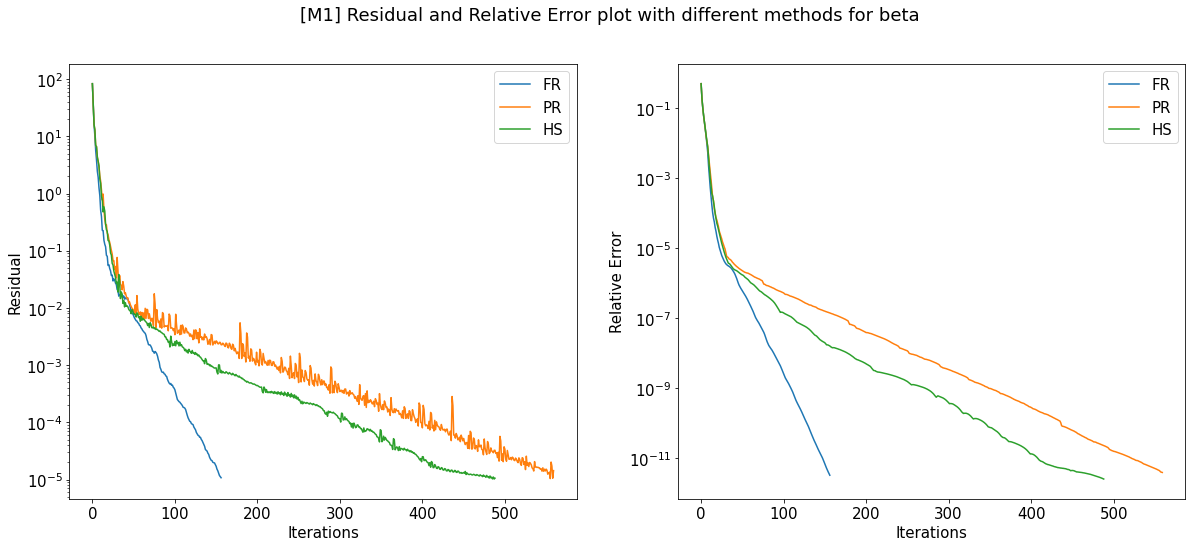

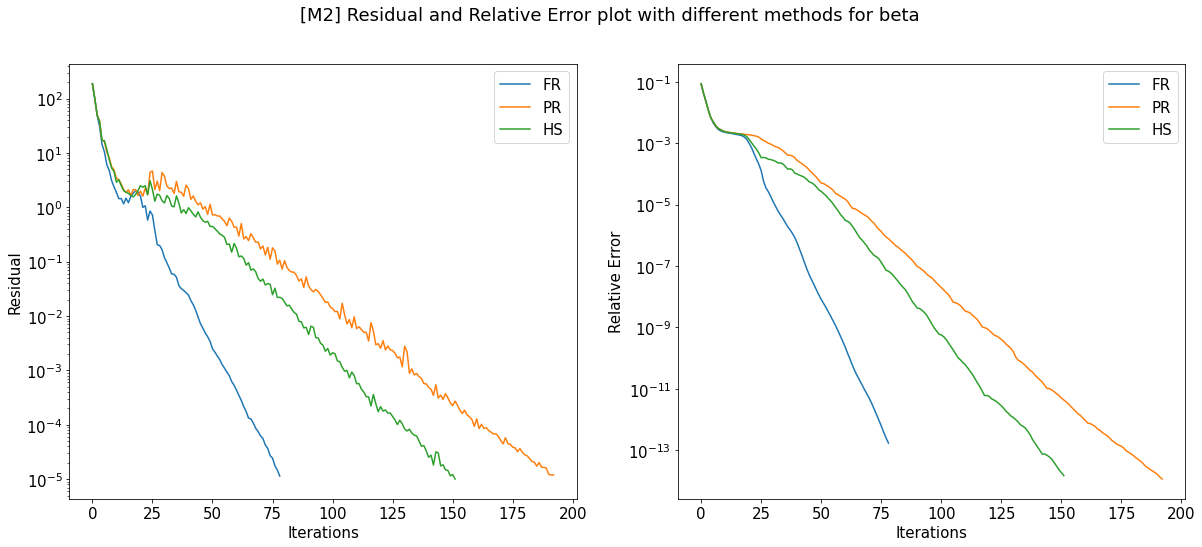

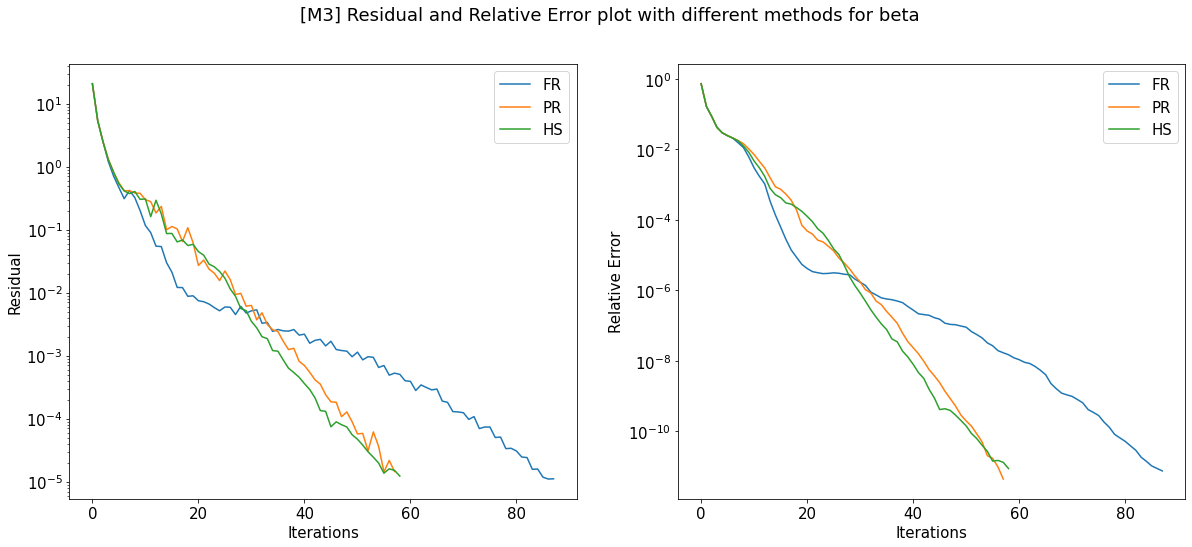

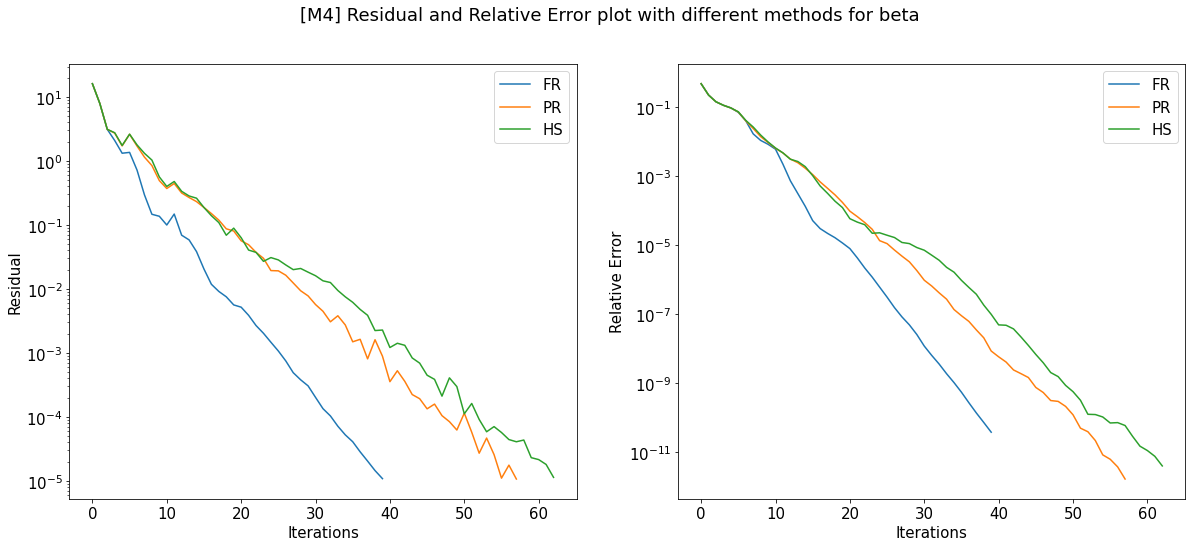

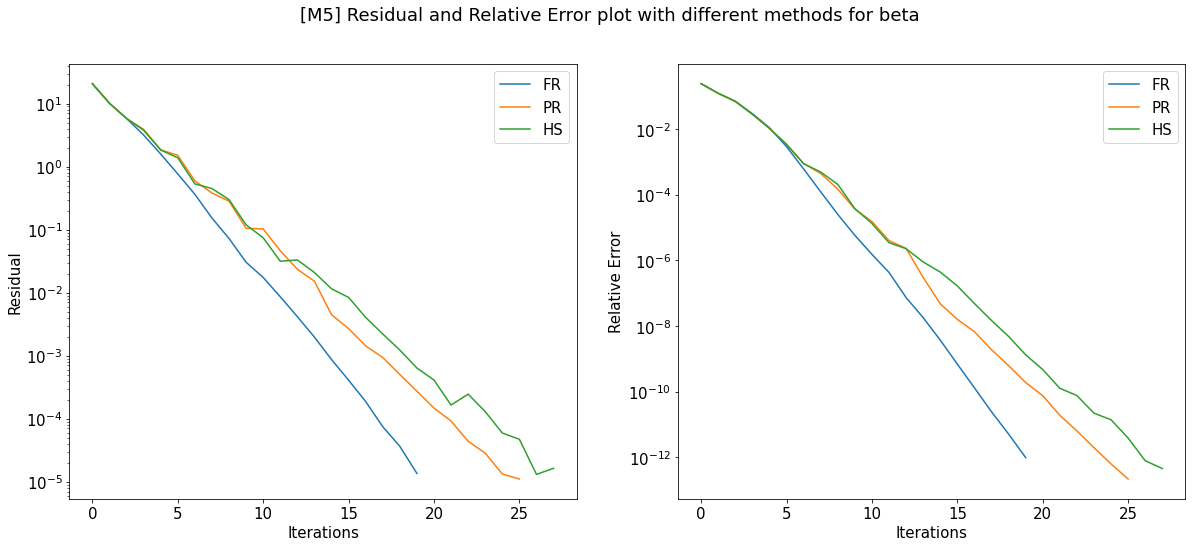

In [15]:
methods = ['FR', 'PR', 'HS']
matrices = [M1, M2, M3, M4, M5]
matrix_names = ['M1', 'M2', 'M3', 'M4', 'M5']
x0s = [x0_m1, x0_m2, x0_m3, x0_m4, x0_m5]
count = 0
for matrix,x0 in zip(matrices,x0s):
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    errors_list = []
    residuals_list = []
    funcs = Funcs(matrix)
    # Initialize the CGD algorithm.
    matrix_norm = np.linalg.norm(matrix, ord=2)
    for method in methods:
        cgd_m1 = CGD(matrix_norm,funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0, 1e-5, 1000, method=method, verboose=False)
        # Run the algorithm.
        residual_matrix, errors_matrix, result_m1 = cgd_m1.cgd()
        errors_list.append(errors_matrix[:-1])
        residuals_list.append(residual_matrix[:-1])
    
    for i in range(len(errors_list)):
        x = list(range(len(errors_list[i])))
        axs[1].plot(x, errors_list[i], label = methods[i])
        axs[0].plot(x, residuals_list[i], label = methods[i])
    axs[0].legend()
    axs[1].legend()
    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xlabel("Iterations")
    axs[1].set_ylabel("Relative Error")
    axs[0].set_xlabel("Iterations")
    axs[0].set_ylabel("Residual")
    fig.suptitle("[" +matrix_names[count]+ "]" + " Residual and Relative Error plot with different methods for beta")
    count+=1